<a href="https://colab.research.google.com/github/ll1195831146/Infor7374-AI/blob/master/Assignment3/Assignment3_E1_BOW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment1-BOW**

In [35]:
import keras
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import json

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils
keras.__version__

'2.2.4'

In [36]:
os.chdir(os.path.join(os.getcwd(),'drive'))
print(os.getcwd())

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-36-05b6a1210885>", line 1, in <module>
    os.chdir(os.path.join(os.getcwd(),'drive'))
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py", line 1823, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.6/di

OSError: ignored

In [0]:
with open('Final_train.json') as train_f:
   train_data = json.load(train_f)
    
with open('Final_test.json') as test_f:
   test_data = json.load(test_f)    

In [0]:
train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)

In [39]:
train_data.shape

(1060, 2)

In [41]:
train_data.head()

,sentiment,text
0,positive,"Thank you, Ellen. We have a strong 2018, with ..."
1,positive,Stock-based compensation totaled $2.3 billion....
10,negative,"For the full-year 2018, Other Bets revenues we..."
100,neutral,Great. Thank you. I just wanted to follow up o...
1000,Neutral,Operator


In [8]:
train_data

,sentiment,text
0,positive,"Thank you, Ellen. We have a strong 2018, with ..."
1,positive,Stock-based compensation totaled $2.3 billion....
10,negative,"For the full-year 2018, Other Bets revenues we..."
100,neutral,Great. Thank you. I just wanted to follow up o...
1000,Neutral,Operator
1001,Neutral,"At this time, there are no further questions. ..."
1002,Neutral,Stephen Scherr
1003,Positive,"Okay. Since there are no more questions, we wo..."
1004,Neutral,Operator
1005,Neutral,"Ms. Miner, you may begin your conference."


In [0]:
train_text = train_data['text']
train_sentiment = train_data['sentiment'].str.lower()

test_text = test_data['text']
test_sentiment = test_data['sentiment'].str.lower()

In [0]:
train_sentiment = train_sentiment.replace('neutra;', 'neutral')
train_sentiment = train_sentiment.replace('postive', 'positive')

In [0]:
max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [45]:
train_text

0       Thank you, Ellen. We have a strong 2018, with ...
1       Stock-based compensation totaled $2.3 billion....
10      For the full-year 2018, Other Bets revenues we...
100     Great. Thank you. I just wanted to follow up o...
1000                                             Operator
1001    At this time, there are no further questions. ...
1002                                       Stephen Scherr
1003    Okay. Since there are no more questions, we wo...
1004                                             Operator
1005            Ms. Miner, you may begin your conference.
1006    Ladies and gentlemen, this does conclude the G...
1007                                        Heather Miner
1008    Good morning. This is Heather Miner, Head of I...
1009    Today on the call, I am joined by our Chairman...
101     Yeah. Really, we're still evaluating the situa...
1010         I'll now pass the call over to David. David?
1011                                        David Solomon
1012    Thanks

In [0]:
tokenize.fit_on_texts(train_text) # only fit on train
x_train = tokenize.texts_to_matrix(train_text, mode='count')
x_test = tokenize.texts_to_matrix(test_text, mode='count')

In [0]:
# Use sklearn utility to convert label strings to numbered index
encoder = LabelEncoder()
encoder.fit(train_sentiment)
y_train = encoder.transform(train_sentiment)
y_test = encoder.transform(test_sentiment)

In [48]:
text_labels = encoder.classes_ 
text_labels

array(['negative', 'neutral', 'positive'], dtype=object)

In [0]:
# Converts the labels to a one-hot representation
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [16]:
# Inspect the dimenstions of our training and test data (this is helpful to debug)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (1060, 1000)
x_test shape: (264, 1000)
y_train shape: (1060, 3)
y_test shape: (264, 3)


In [17]:
x_train

array([[ 0.,  1.,  2., ...,  0.,  0.,  0.],
       [ 0.,  4.,  2., ...,  0.,  0.,  0.],
       [ 0.,  2.,  1., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  3.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  3., 10., ...,  0.,  0.,  0.]])

In [0]:
batch_size = 32
epochs = 4

In [19]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               512512    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1539      
_________________________________________________________________
activation_2 (Activation)    (None, 3)                 0         
Total params: 514,051
Trainable params: 514,051
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 1060 samples, validate on 264 samples
Epoch 1/4
1060/1060 [==============================] - 1s 992us/step - loss: 0.9376 - acc: 0.6528 - val_loss: 1.0882 - val_acc: 0.6023
Epoch 2/4
1060/1060 [==============================] - 0s 157us/step - loss: 0.6279 - acc: 0.7962 - val_loss: 1.0174 - val_acc: 0.5758
Epoch 3/4
1060/1060 [==============================] - 0s 158us/step - loss: 0.4227 - acc: 0.8642 - val_loss: 1.1875 - val_acc: 0.5909
Epoch 4/4
1060/1060 [==============================] - 0s 155us/step - loss: 0.3295 - acc: 0.9000 - val_loss: 1.2708 - val_acc: 0.5833


In [22]:
# Evaluate the accuracy of our trained model
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

264/264 [==============================] - 0s 78us/step
Test score: 1.2708252704504766
Test accuracy: 0.5833333333333334


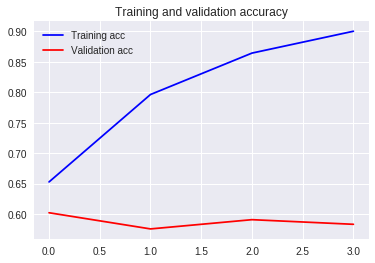

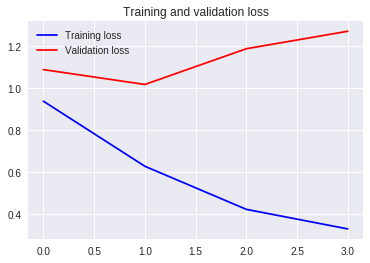

In [23]:
# visualization
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epoch = range(len(acc))
 
plt.plot(epoch, acc, 'b', label='Training acc')
plt.plot(epoch, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epoch, loss, 'b', label='Training loss')
plt.plot(epoch, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [0]:
y_softmax = model.predict(x_test)

y_test_1d = []
y_pred_1d = []

for i in range(len(y_test)):
    probs = y_test[i]
    index_arr = np.nonzero(probs)
    one_hot_index = index_arr[0].item(0)
    y_test_1d.append(one_hot_index)

for i in range(0, len(y_softmax)):
    probs = y_softmax[i]
    predicted_index = np.argmax(probs)
    y_pred_1d.append(predicted_index)

In [0]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

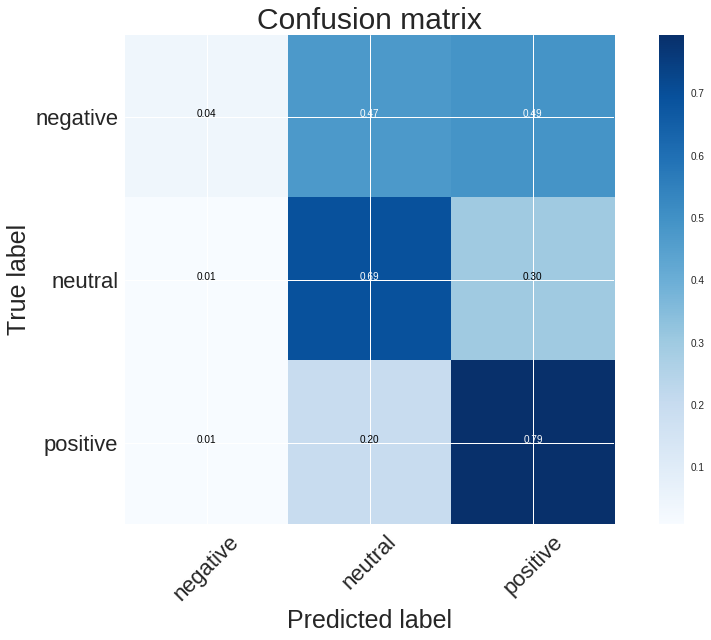

In [0]:
text_labels = encoder.classes_ 
cnf_matrix = confusion_matrix(y_test_1d, y_pred_1d)
plt.figure(figsize=(16,9))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

In [0]:
# save_dir = os.path.join(os.getcwd(), 'saved_models')
# model_name = 'keras_BOW_trained_model_E1-1.h5'
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('Saved trained model at %s ' % model_path)

**Experiment(2)**

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
vectorizer = CountVectorizer(min_df=0)
vectorizer.fit(train_text)
vectorizer.vocabulary_

{'thank': 4137,
 'you': 4592,
 'ellen': 1438,
 'we': 4487,
 'have': 1983,
 'strong': 3981,
 '2018': 49,
 'with': 4541,
 'total': 4216,
 'revenues': 3536,
 'of': 2850,
 '136': 17,
 'billion': 587,
 'up': 4352,
 '23': 58,
 'over': 2943,
 '2017': 48,
 'reflecting': 3402,
 'the': 4140,
 'benefit': 562,
 'our': 2926,
 'ongoing': 2880,
 'investments': 2269,
 'to': 4200,
 'deliver': 1201,
 'exceptional': 1571,
 'experiences': 1612,
 'for': 1758,
 'users': 4379,
 'and': 343,
 'compelling': 911,
 'returns': 3532,
 'advertisers': 259,
 'partners': 2986,
 'enterprise': 1491,
 'customers': 1124,
 'stock': 3948,
 'based': 520,
 'compensation': 913,
 'totaled': 4217,
 'headcount': 1990,
 'at': 453,
 'end': 1465,
 'quarter': 3294,
 'was': 4476,
 '98': 161,
 '771': 144,
 '399': 87,
 'from': 1806,
 'last': 2373,
 'consistent': 993,
 'prior': 3176,
 'quarters': 3296,
 'majority': 2524,
 'new': 2787,
 'hires': 2036,
 'were': 4507,
 'engineers': 1477,
 'product': 3201,
 'managers': 2534,
 'in': 2120,
 'te

In [0]:
x_train = vectorizer.transform(train_text)
x_test = vectorizer.transform(test_text)

In [30]:
x_train

<1060x4603 sparse matrix of type '<class 'numpy.int64'>'
	with 43671 stored elements in Compressed Sparse Row format>

In [0]:
# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(x_train.shape[1],)))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [32]:
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

Train on 1060 samples, validate on 264 samples
Epoch 1/4
1060/1060 [==============================] - 1s 637us/step - loss: 0.8981 - acc: 0.6830 - val_loss: 0.9952 - val_acc: 0.5985
Epoch 2/4
1060/1060 [==============================] - 0s 286us/step - loss: 0.5215 - acc: 0.8330 - val_loss: 1.0261 - val_acc: 0.5947
Epoch 3/4
1060/1060 [==============================] - 0s 301us/step - loss: 0.3050 - acc: 0.9066 - val_loss: 1.1973 - val_acc: 0.6098
Epoch 4/4
1060/1060 [==============================] - 0s 277us/step - loss: 0.1840 - acc: 0.9538 - val_loss: 1.2442 - val_acc: 0.6023


In [33]:
# Evaluate the accuracy of our trained model
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

264/264 [==============================] - 0s 111us/step
Test score: 1.244230133114439
Test accuracy: 0.6022727272727273


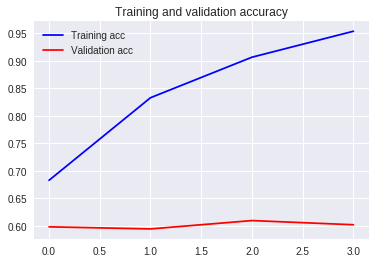

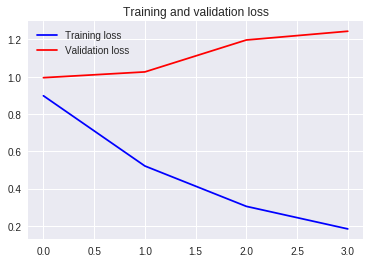

In [34]:
# visualization
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epoch = range(len(acc))
 
plt.plot(epoch, acc, 'b', label='Training acc')
plt.plot(epoch, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epoch, loss, 'b', label='Training loss')
plt.plot(epoch, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

In [0]:
# save_dir = os.path.join(os.getcwd(), 'saved_models')
# model_name = 'keras_BOW_trained_model_E1-2.h5'
# model_path = os.path.join(save_dir, model_name)
# model.save(model_path)
# print('Saved trained model at %s ' % model_path)